In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.reset_orig()

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

# Generate data

In [3]:
cheese_types = (
    "Brie",
    "Cheddar",
    "Mozzarella",
    "Gouda",
    "Roquefort",
)

bread_types = (
    "Sourdough",
    "Baguette",
    "Rye",
    "Pumpernickel",
    "Focaccia",
)

salad_types = (
    "Caesar",
    "Greek",
    "Cobb",
    "Caprese",
    "Waldorf",
)
data = {
    "cheese": cheese_types,
    "bread": bread_types,
    "salad": salad_types,
}

data = [(key, value) for key, values in data.items() for value in values]
df = pd.DataFrame(data, columns=["food", "value"])

np.random.seed(42)
df["proportion"] = (np.random.rand(len(df)) * 100 * 0.8).tolist()
df.to_csv("food.csv")
df

,food,value,proportion
0,cheese,Brie,29.963210
1,cheese,Cheddar,76.057145
2,cheese,Mozzarella,58.559515
3,cheese,Gouda,47.892679
4,cheese,Roquefort,12.481491
5,bread,Sourdough,12.479562
6,bread,Baguette,4.646689
7,bread,Rye,69.294092
8,bread,Pumpernickel,48.089201
9,bread,Focaccia,56.645806


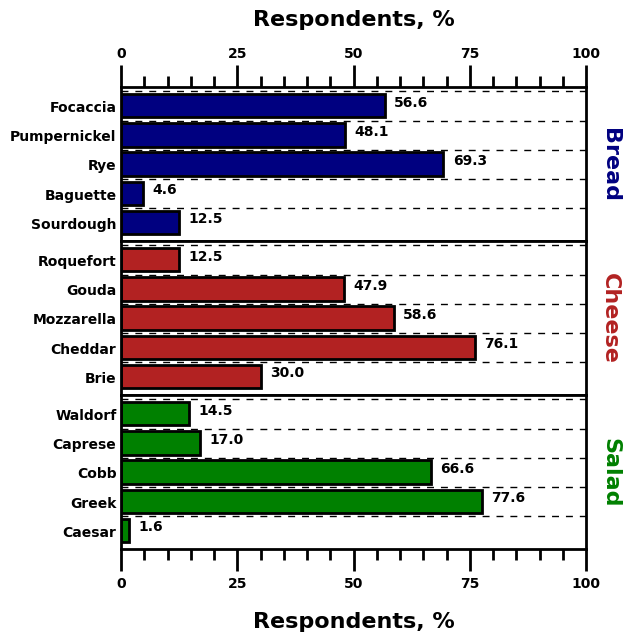

In [4]:
from matplotlib.ticker import AutoMinorLocator

df = pd.read_csv("food.csv", index_col=0)
fig, axs = plt.subplots(3, 1, figsize=(6, 6))
fig.subplots_adjust(hspace=0)

color_mapping = {
    "cheese": "firebrick",
    "bread": "navy",
    "salad": "green",
}

for i, (group, data) in enumerate(df.groupby("food")):
    ax: plt.Axes = axs[i]
    bars = ax.barh(
        data.value,
        data.proportion,
        facecolor=color_mapping[group],
        edgecolor="black",
        linewidth=2,
    )
    ax.set_xticks([])

    for index, value in enumerate(data.proportion):
        ax.text(value + 2, index, f"{round(value, 1)}", weight="bold")

    ax.tick_params(axis="y", length=0)
    ax.tick_params(axis="x", length=6, width=2)
    ax.set_xlim(0, 100)

    ax.text(
        1.03,
        0.5,
        group.capitalize(),
        transform=ax.transAxes,
        rotation=-90,
        weight="bold",
        fontsize=16,
        verticalalignment="center",
        color=color_mapping[group],
    )

    for label in ax.get_yticklabels():
        label.set_weight("bold")

    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(2)

    # Get bar coordinates and dimension
    bars_info = [(bar.get_y() - 0.11, bar.get_width()) for bar in bars]  # TODO improve

    for bar_y, bar_width in bars_info:
        ax.axhline(y=bar_y + 1, color="k", ls=(0, (5, 5)), lw=1)


ax = axs[0]
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_minor_locator(AutoMinorLocator())

position_params = dict(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(which="minor", **position_params, axis="x", length=8, width=2)
ax.tick_params(**position_params, axis="x", length=16, width=2)

ax.set_xlabel("Respondents, %", weight="bold", fontsize=16, labelpad=15)
ax.xaxis.set_label_position("top")
for label in ax.get_xticklabels():
    label.set_weight("bold")

ax = axs[-1]
ax.set_xticks([0, 25, 50, 75, 100])

position_params = dict(top=False, labeltop=False, bottom=True, labelbottom=True)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which="minor", **position_params, axis="x", length=8, width=2)
ax.tick_params(**position_params, axis="x", length=16, width=2)

ax.set_xlabel("Respondents, %", weight="bold", fontsize=16, labelpad=15)
ax.xaxis.set_label_position("bottom")
for label in ax.get_xticklabels():
    label.set_weight("bold")

fig.savefig(
    figures_path / "advanced_matplotlib_barplot.png",
    dpi=300,
    bbox_inches="tight",
)

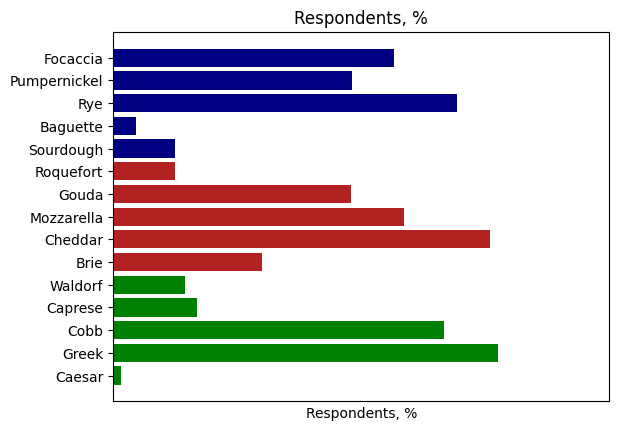

In [5]:
df = pd.read_csv("food.csv", index_col=0)
fig, ax = plt.subplots()

color_mapping = {
    "cheese": "firebrick",
    "bread": "navy",
    "salad": "green",
}

categories = ["bread", "cheese", "salad"]
categories.reverse()

all_y_coordinates = []
all_labels = []

for i, group in enumerate(categories):
    data = df[df["food"] == group]
    y_coordinates = i * 5 + np.arange(len(data))
    all_y_coordinates.extend(y_coordinates)
    all_labels.extend(data.value)
    ax.barh(
        y_coordinates,
        data.proportion,
        color=color_mapping[group],
    )

ax.set_yticks(all_y_coordinates)
ax.set_yticklabels(all_labels)

ax.set_xlim(0, 100)
ax.set_xlabel("Respondents, %")
ax.set_title("Respondents, %")
ax.set_xticks([])

fig.savefig(figures_path / "base_matplotlib_barplot.png", dpi=300, bbox_inches="tight")